<a href="https://colab.research.google.com/github/nandansuresh97/practise-/blob/main/psoutlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('/content/titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.set_index('PassengerId', inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

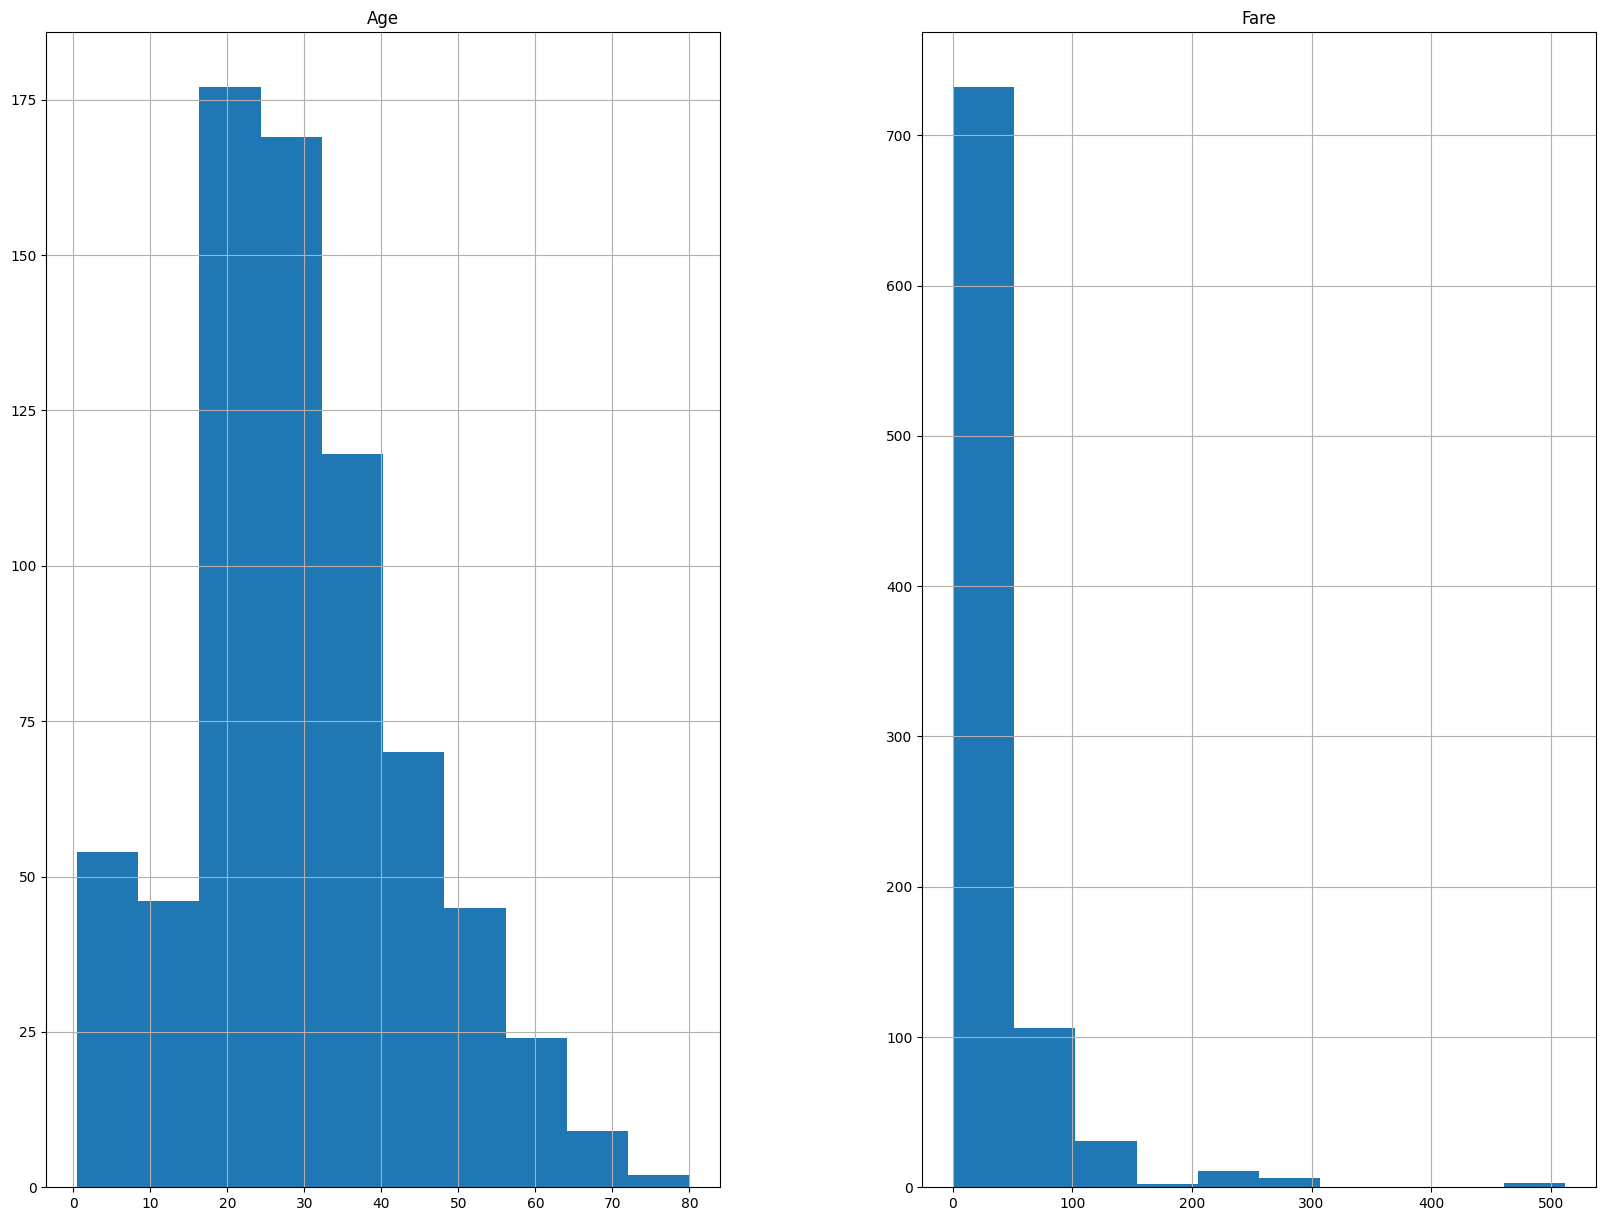

In [15]:
freqgraph = df.select_dtypes(include="float64")
freqgraph.hist(figsize=(20,15))

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.fillna(method='ffill', inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

In [17]:
df.fillna(method='bfill', inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [18]:
num_cols = ['Age', 'Fare', 'Survived']

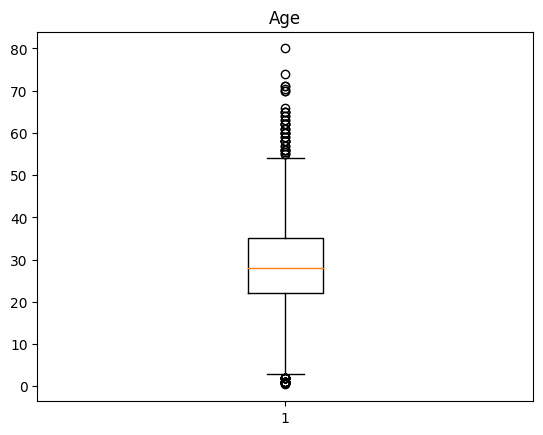

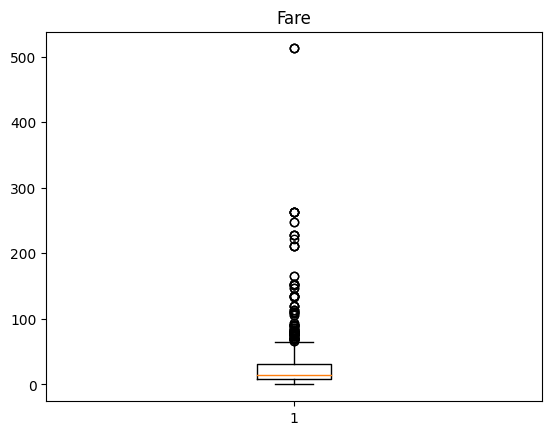

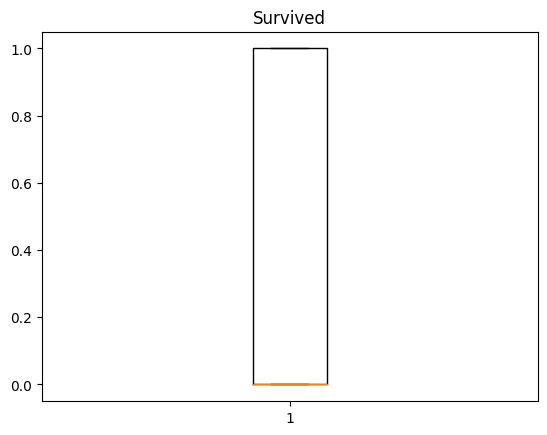

In [19]:
for i in num_cols:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i)

In [20]:
Q1 = np.percentile(df['Age'],25,method='midpoint')
Q2 = np.percentile(df['Age'],50,method='midpoint')
Q3 = np.percentile(df['Age'],75,method='midpoint')

In [21]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  22.0
Q2 is  28.0
Q3 is  35.0


In [22]:
IQR = Q3-Q1
IQR

13.0

In [23]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [24]:
print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  2.5
upper limit is  54.5


In [26]:
outlier=[]
for x in df['Age']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [27]:
df['Age'] = df['Age'].clip(lower=low_lim , upper=up_lim)

In [29]:
outlier=[]
for x in df['Age']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)

outlier

[]

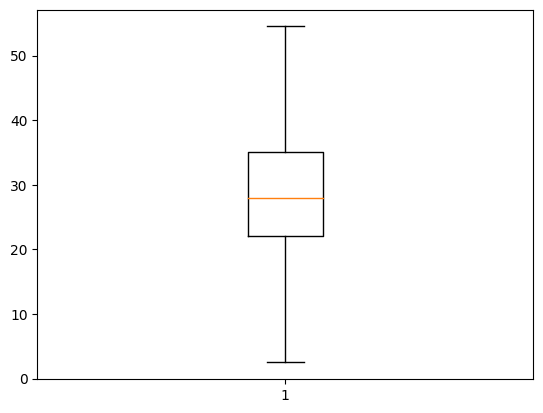

In [30]:
plt.boxplot(df['Age'])
plt.show();

In [31]:
Q1 = np.percentile(df['Fare'],25,method='midpoint')
Q2 = np.percentile(df['Fare'],50,method='midpoint')
Q3 = np.percentile(df['Fare'],75,method='midpoint')

In [32]:
print("Q1 is ",Q1)
print("Q2 is ",Q2)
print("Q3 is ",Q3)

Q1 is  7.9104
Q2 is  14.4542
Q3 is  31.0


In [33]:
IQR = Q3-Q1
IQR

23.0896

In [34]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [35]:
print("lower limit is ",low_lim)
print("upper limit is ",up_lim)

lower limit is  -26.724
upper limit is  65.6344


In [38]:
outlier=[]
for x in df['Fare']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [39]:
df['Fare'] = df['Fare'].clip(lower=low_lim , upper=up_lim)

In [40]:
outlier=[]
for x in df['Age']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)

outlier

[]

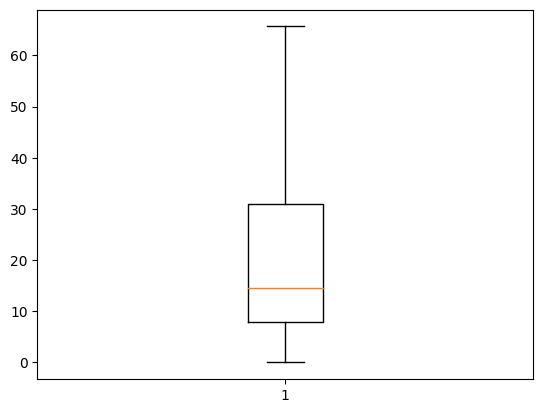

In [41]:
plt.boxplot(df['Fare'])
plt.show();

In [42]:
df1= df.drop(['Survived'],axis=1)

In [43]:
from sklearn.preprocessing import MinMaxScaler
min_scaler = MinMaxScaler()


In [45]:
numeric_columns = df1.select_dtypes(include=['number']).columns

In [46]:
df1_scaled = min_scaler.fit_transform(df1[numeric_columns])

In [47]:
df1_scaled_new = pd.DataFrame(df1_scaled)
df1_scaled_new.head(10)

,0,1,2,3,4
0,1.0,0.375000,0.125,0.000000,0.110460
1,0.0,0.682692,0.125,0.000000,1.000000
2,1.0,0.451923,0.000,0.000000,0.120745
3,0.0,0.625000,0.125,0.000000,0.809027
4,1.0,0.625000,0.000,0.000000,0.122649
5,1.0,0.490385,0.000,0.000000,0.128870
6,0.0,0.990385,0.000,0.000000,0.790173
7,1.0,0.000000,0.375,0.166667,0.321097
8,1.0,0.471154,0.000,0.333333,0.169626
9,0.5,0.221154,0.125,0.000000,0.458156
